In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
df_customers = pd.read_csv('datasets/customers.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_orders = pd.read_csv('datasets/order_items.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_items = pd.read_csv('datasets/po_items.csv', parse_dates=['created_at'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))
df_reviews = pd.read_csv('datasets/Reviews_export_2024_09_10_14_47_09.783.csv', parse_dates=['Review Creation Date'],
                          date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y %I:%M %p'))

C:\Users\user\AppData\Local\Temp\ipykernel_2020\2084181180.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_customers = pd.read_csv('datasets/customers.csv', parse_dates=['created_at'],
C:\Users\user\AppData\Local\Temp\ipykernel_2020\2084181180.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_orders = pd.read_csv('datasets/order_items.csv', parse_dates=['created_at'],
C:\Users\user\AppData\Local\Temp\ipykernel_2020\2084181180.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_items = pd.read_csv('datasets/po_items

In [37]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260896 entries, 0 to 260895
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     260896 non-null  int64         
 1   order_id               260896 non-null  int64         
 2   description            260895 non-null  object        
 3   sku                    260896 non-null  object        
 4   regular_price          260262 non-null  float64       
 5   price                  260896 non-null  float64       
 6   qty                    260896 non-null  int64         
 7   subtotal               260896 non-null  float64       
 8   total_discount_amount  260896 non-null  float64       
 9   code                   1386 non-null    object        
 10  description.1          48196 non-null   object        
 11  tax_amount             260896 non-null  float64       
 12  total                  260896 non-null  floa

In [38]:
df_customers.head(3)

,id,order_id,description,sku,regular_price,price,qty,subtotal,total_discount_amount,code,description.1,tax_amount,total,created_at
0,679118,496977,TaylorMade SIM Max Iron Set 5-PW and AW Stiff ...,TM-S17427,799.99,799.99,1,799.99,0.0,NaN,NaN,40.00,839.99,2021-09-10 00:00:00
1,679119,496978,TaylorMade M4 Iron Set 5-PW and AW Regular Rig...,TM-S17574,699.99,699.99,1,699.99,70.0,NaN,2021-01 - 10% Welcome - Unique Codes,94.34,724.33,2021-09-10 00:04:00
2,679120,496978,Titleist 816H1 4 Hybrid 23¬∞ Regular Right-Han...,TS-H08614,109.99,109.99,1,109.99,11.0,NaN,2021-01 - 10% Welcome - Unique Codes,14.82,113.81,2021-09-10 00:04:00


In [39]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261287 entries, 0 to 261286
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     261287 non-null  int64         
 1   order_id               261287 non-null  int64         
 2   customer_id            261287 non-null  int64         
 3   description            261286 non-null  object        
 4   model                  260950 non-null  object        
 5   brand                  260950 non-null  object        
 6   type                   260950 non-null  object        
 7   model_id               260950 non-null  float64       
 8   sku                    261287 non-null  object        
 9   currency               261287 non-null  object        
 10  regular_price          260653 non-null  float64       
 11  price                  261287 non-null  float64       
 12  qty                    261287 non-null  int6

In [40]:
df_orders.head(3)

,id,order_id,customer_id,description,model,brand,type,model_id,sku,currency,regular_price,price,qty,subtotal,total_discount_amount,code,description.1,tax_amount,total,created_at
0,679118,496977,329221,TaylorMade SIM Max Iron Set 5-PW and AW Stiff ...,SIM Max,TaylorMade,Iron Set,11150.0,TM-S17427,CAD,799.99,799.99,1,799.99,0.0,NaN,NaN,40.00,839.99,2021-09-10 00:00:00
1,679119,496978,416222,TaylorMade M4 Iron Set 5-PW and AW Regular Rig...,M4,TaylorMade,Iron Set,9277.0,TM-S17574,CAD,699.99,699.99,1,699.99,70.0,NaN,2021-01 - 10% Welcome - Unique Codes,94.34,724.33,2021-09-10 00:05:00
2,679120,496978,416222,Titleist 816H1 4 Hybrid 23¬∞ Regular Right-Han...,816H1,Titleist,Hybrid,7562.0,TS-H08614,CAD,109.99,109.99,1,109.99,11.0,NaN,2021-01 - 10% Welcome - Unique Codes,14.82,113.81,2021-09-10 00:05:00


In [41]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235854 entries, 0 to 235853
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 235854 non-null  int64         
 1   customer_id        235854 non-null  int64         
 2   purchase_order_id  235854 non-null  int64         
 3   status             235854 non-null  object        
 4   model              235854 non-null  object        
 5   product_type       235854 non-null  object        
 6   brand              235854 non-null  object        
 7   model_id           235854 non-null  int64         
 8   brand_id           235854 non-null  int64         
 9   product_type_id    235854 non-null  int64         
 10  price              235854 non-null  float64       
 11  currency           235854 non-null  object        
 12  subtotal           0 non-null       float64       
 13  margin_total       235854 non-null  float64 

In [42]:
df_items['received_at'] = pd.to_datetime(df_items['received_at'], format='%m/%d/%y %I:%M %p', errors='coerce')
df_items['inspected_at'] = pd.to_datetime(df_items['inspected_at'], format='%m/%d/%y %I:%M %p', errors='coerce')

In [43]:
df_items.head(9)

,id,customer_id,purchase_order_id,status,model,product_type,brand,model_id,brand_id,product_type_id,price,currency,subtotal,margin_total,bonus_total,total,created_at,received_at,inspected_at
0,767181,416193,43112,Rejected,XR,Driver,Callaway,5622,5,2,95.0,CAD,NaN,0.0,9.5,104.5,2021-09-10 00:30:00,NaT,NaT
1,767182,416228,43113,Open,M3,Driver,TaylorMade,9265,28,2,150.0,USD,NaN,0.0,15.0,165.0,2021-09-10 01:30:00,NaT,NaT
2,767183,416228,43113,Open,AP2 716 Forged,Iron Set,Titleist,7505,30,4,390.0,USD,NaN,0.0,39.0,429.0,2021-09-10 01:30:00,NaT,NaT
3,767184,415077,43114,Open,SIM Max,Iron Set,TaylorMade,11150,28,4,325.0,USD,NaN,0.0,65.0,390.0,2021-09-10 01:30:00,NaT,NaT
4,767185,416235,43115,Open,Blueprint,Iron Set,Ping,11197,21,4,645.0,USD,NaN,0.0,129.0,774.0,2021-09-10 01:30:00,NaT,NaT
5,767186,317142,43116,Open,718 AP1,Iron Set,Titleist,8815,30,4,460.0,CAD,NaN,0.0,46.0,506.0,2021-09-10 02:00:00,NaT,NaT
6,767187,416249,43117,Accepted,M1 460 2017,Driver,TaylorMade,8285,28,2,175.0,CAD,NaN,0.0,17.5,192.5,2021-09-10 02:30:00,NaT,2021-09-23 12:15:00
7,767188,392519,43118,Accepted,Huntington Beach Soft 4,Putter,Cleveland,34902,7,6,60.0,CAD,NaN,0.0,6.0,66.0,2021-09-10 02:30:00,NaT,2021-09-23 14:33:00
8,767189,392519,43118,Accepted,G SF Tec,Driver,Ping,7773,21,2,165.0,CAD,NaN,0.0,16.5,181.5,2021-09-10 02:30:00,NaT,2021-09-23 14:32:00


In [44]:
df_items.received_at.nunique()

0

In [45]:
df_reviews['Order Date'] = pd.to_datetime(df_reviews['Order Date'], format='%m/%d/%Y')

In [46]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693 entries, 0 to 10692
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Review ID               10693 non-null  int64         
 1   Review Creation Date    10693 non-null  datetime64[ns]
 2   Review Type             10693 non-null  object        
 3   Review Status           10693 non-null  object        
 4   Status Details          0 non-null      float64       
 5   Review Source           10693 non-null  object        
 6   Review Score            10693 non-null  int64         
 7   Review Title            10691 non-null  object        
 8   Review Content          10691 non-null  object        
 9   Sentiment Score         10687 non-null  float64       
 10  Profanity Flag          45 non-null     float64       
 11  Published Image URLs    0 non-null      float64       
 12  Unpublished Image URLs  139 non-null    object

In [47]:
df_reviews.head(3)

,Review ID,Review Creation Date,Review Type,Review Status,Status Details,Review Source,Review Score,Review Title,Review Content,Sentiment Score,...,Product Handle,Product Group,Product Category,Product UPC,Product SKU,Product Brand,Product MPN,Product ISBN,Incentivized Flag,Metaobject handle
0,620130900,2024-09-09 20:07:00,site_review,Published,NaN,site_review_after_product,5,Great product and as promised,Great product and as promised delivery date. I...,0.991433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,620130775,2024-09-09 20:05:00,product_review,Published,NaN,reminder,5,Great clubs and in very,Great clubs and in very good condition at a gr...,0.985991,...,NaN,NaN,NaN,NaN,5-763#,Callaway,NaN,NaN,NaN,NaN
2,620125988,2024-09-09 19:35:00,product_review,Published,NaN,syndication,5,I love them and they,I love them and they are in great condition,0.979976,...,NaN,NaN,NaN,NaN,NaN,Titleist,NaN,NaN,NaN,NaN


# 1. Who is Laps.com
**Market place where people buy and sell or trade their golf clubs and others golfs items**

A customer can be both a buyer and seller

Do they buy only their branded golfs products they sell, or anyone can come and sell their golfs product even if they haven bought them with the brand?

To answer this question, lets observe the clients that are both buyers and sellers, if any.

The datasets df_customers and df_orders are connected by the id column, where the df_orders details the recordings about the orders from the df_customers.

At the same time, the sku column is an indicator that the orders have stock keeping unit (unique identifier of a product).

The df_items contains the orders of the buyers, judging by the column with statuses and columns with timestamps for the date of inspection and receipt.

The relationship between df_orders and df_items is built on the column customer_id. So lets merge the datasets of sellers an buyers to observe whether 

In [48]:
df_customers_orders = pd.merge(df_orders, df_items, on='customer_id', how='inner')

In [49]:
check_customers = df_customers_orders[['customer_id', 'brand_x', 'brand_y']].groupby(['customer_id', 'brand_x', 'brand_y'], as_index=False).size()
check_customers['same_brand'] = check_customers['brand_x'] == check_customers['brand_y']

In [93]:
customers_with_no_true = check_customers.groupby('customer_id')['same_brand'].apply(lambda x: all(x == False))

customers_with_no_true_ids = customers_with_no_true[customers_with_no_true].index

df_filtered = df_customers_orders[df_customers_orders['customer_id'].isin(customers_with_no_true_ids)]

brand_combinations = df_filtered[['customer_id', 'brand_x', 'brand_y']].drop_duplicates()
brand_combinations

,customer_id,brand_x,brand_y
127,397347,Footjoy,Ping
129,416319,Wilson,Mizuno
139,265955,TaylorMade,Cleveland
141,265955,TaylorMade,Nike
142,265955,TaylorMade,Cobra
...,...,...,...
551685,1198330,Ping,PXG
551686,1198330,Ping,Tour Edge
551687,431862,TaylorMade,Ping
551688,1198371,Ping,TaylorMade


In [107]:
# Count unique customers in Dataset 1
unique_customers_df1 = df_orders['customer_id'].nunique()

# Count unique customers in Dataset 2
unique_customers_df2 = df_items['customer_id'].nunique()

unique_customers_intersection = df_customers_orders['customer_id'].nunique()

C:\Users\user\AppData\Local\Temp\ipykernel_2020\1399397794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(customer_counts.keys()), y=list(customer_counts.values()), palette="Set2")


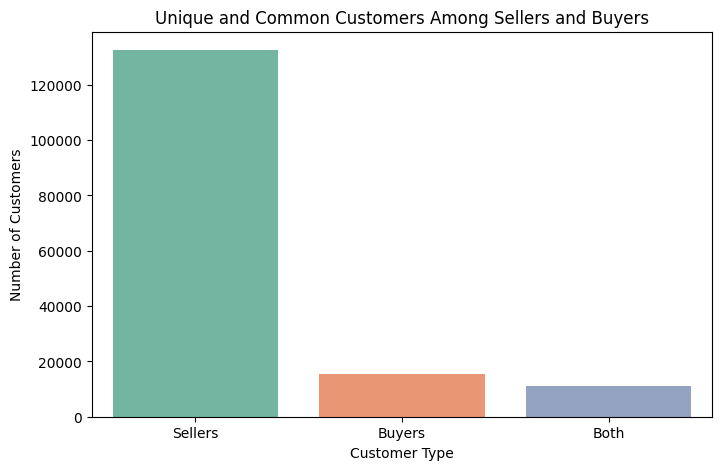

In [118]:
customer_counts = {
    'Sellers': unique_customers_df1,
    'Buyers': unique_customers_df2,
    'Both': unique_customers_intersection
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(customer_counts.keys()), y=list(customer_counts.values()), palette="Set2")

# Customize plot
plt.title("Unique and Common Customers Among Sellers and Buyers")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Type")
plt.savefig('unique_customers.png', dpi=300, bbox_inches='tight')  # Save as PNG file
plt.show()  # Display the plot

Seemingly, some customers can sell the brands without previously buying any products with the same brand.

# 2. We have .com and .co.uk  site 
**Are we getting both datasets**

In [51]:
df_items.currency.unique()

array(['CAD', 'USD'], dtype=object)

In [52]:
df_orders.currency.unique()

array(['CAD', 'USD'], dtype=object)

We cannot see the GBP code there, so we don't have the data from co.uk site, offering the prices in local currency.

# 3. What is the customer lifetime span?

In [129]:
# Group by customer_id and calculate first and last purchase dates for orders
df_orders_clv = df_orders.groupby('customer_id', as_index=False)['created_at'].agg(
    first_purchase_date='min',
    last_purchase_date='max'
)

# Group by customer_id and calculate first and last purchase dates for items
df_items_clv = df_items.groupby('customer_id', as_index=False)['created_at'].agg(
    first_purchase_date='min',
    last_purchase_date='max'
)

# Merge the two DataFrames on customer_id
df_clv_combined = pd.merge(df_orders_clv, df_items_clv, on='customer_id', suffixes=('_orders', '_items'))

# Calculate the overall first and last purchase dates for CLV calculation
df_clv_combined['overall_first_purchase_date'] = df_clv_combined[['first_purchase_date_orders', 'first_purchase_date_items']].min(axis=1)
df_clv_combined['overall_last_purchase_date'] = df_clv_combined[['last_purchase_date_orders', 'last_purchase_date_items']].max(axis=1)

# Calculate CLV in days
df_clv_combined['clv_days'] = (df_clv_combined['overall_last_purchase_date'] - df_clv_combined['overall_first_purchase_date']).dt.days / 365

print(f'Average customer lifetime span among sellers and buyers is {round(df_clv_combined.clv_days.mean())} year')

Average customer lifetime span among sellers and buyers is 1 year
